1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



The estimated max speed occuring every 50 year is 33.99121541124585


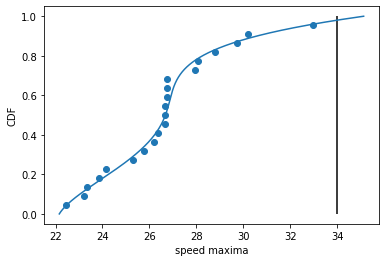

In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# load the dataset
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

# Compute then the cumulative probability 𝑝𝑖 (cprob)
cprob = np.arange(1, years_nb + 1)/(years_nb + 1)

# sort the maximum speeds from the data
max_speeds = np.sort(max_speeds)

# use the UnivariateSpline from scipy.interpolate to define a quantile function
quantile_func = UnivariateSpline(cprob, max_speeds, k=4)

# estimate the probabilities.
probs = np.linspace(0, 1, 1000)
plt.plot(quantile_func(probs), probs)
plt.scatter(max_speeds, cprob)

# the maximum wind speed occurring every 50 years is defined as the upper 2% quantile
fifty_prob = 1. - 0.02

# the storm wind speed occurring every 50 years can be guessed as:
fifty_wind = quantile_func(fifty_prob)

plt.xlabel('speed maxima')
plt.ylabel('CDF')
plt.vlines(fifty_wind, ymin=0, ymax=1)

print(f"The estimated max speed occuring every 50 year is {fifty_wind}")

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Yes the fit is reasonable, also makes sense to model with a periodic function
Yes the time offset for min and max temperatures are the same within the fit accuracy


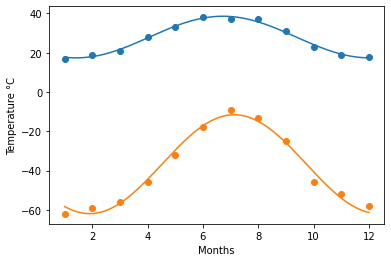

In [2]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

t_max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
t_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.arange(1,13)

plt.figure()
plt.scatter(months, t_max)
plt.scatter(months, t_min)
plt.ylabel("Temperature °C")
plt.xlabel("Months")

def sinfunc(x, a, b, c, d):
    return a * np.sin(b * (x-c)) + d

c_M, _ = optimize.curve_fit(sinfunc, months, t_max, p0=[25, 0.5, 10, 4])
c_m, _ = optimize.curve_fit(sinfunc, months, t_min, p0=[10, 0.5, 10, 4])

x = np.linspace(1,12, 10000)
plt.plot(x, sinfunc(x, c_M[0], c_M[1], c_M[2], c_M[3])) 
plt.plot(x,  sinfunc(x, c_m[0], c_m[1], c_m[2], c_m[3]))

print("Yes the fit is reasonable, also makes sense to model with a periodic function")
print("Yes the time offset for min and max temperatures are the same within the fit accuracy")

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


The result with initial guess [-2, -1] is: [ 0.07783933 -0.61875879]
The result with initial guess [-2, -0.75] is: [ 0.07783925 -0.61875879]
The result with initial guess [-2, 0] is: [-0.07783934  0.61875862]
The result with initial guess [-2, 0.75] is: [-0.07783915  0.61875879]
The result with initial guess [-2, 1] is: [-0.07783934  0.618759  ]
The result with initial guess [-0.5, -1] is: [ 0.07783943 -0.61875851]
The result with initial guess [-0.5, -0.75] is: [ 0.07783933 -0.61875879]
The result with initial guess [-0.5, 0] is: [-0.07783934  0.61875854]
The result with initial guess [-0.5, 0.75] is: [-0.07783818  0.61875865]
The result with initial guess [-0.5, 1] is: [-0.07783933  0.61875889]
The result with initial guess [0, -1] is: [-0.07784002  0.61875956]
The result with initial guess [0, -0.75] is: [ 0.07783907 -0.61875889]
The result with initial guess [0, 0] is: [0. 0.]
The result with initial guess [0, 0.75] is: [-0.07783907  0.61875889]
The result with initial guess [0, 1]

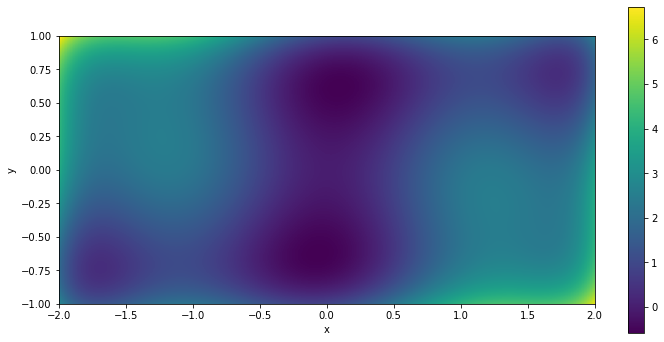

In [3]:
from scipy.optimize import minimize

# six-hump camelback function
def f(xy_pair):
    x = xy_pair[0]
    y = xy_pair[1]
    return (4 - 2.1*x**2 + 1/3*x**4)*x**2+x*y+(4*y**2-3)*y**2

# restrict variables to −2<𝑥<2 and −1<𝑦<1.
N_samples = 100
ymax = 2
xmax = 1
xs = np.arange(-ymax, ymax, ymax/N_samples)
ys = np.arange(-xmax, xmax, xmax/N_samples)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (12, 6))
x, y = np.meshgrid(xs, ys, sparse=True)
xy_pair = np.array([x,y], dtype='object')

image = axes.imshow(f(xy_pair), extent=[-2, 2, -1, 1])
fig.colorbar(image, ax=axes)
axes.set_xlabel("x")
axes.set_ylabel("y")

# try a grid of x,y
x_grid = [-2, -0.5, 0, 0.5, 2]
y_grid = [-1, -0.75, 0, 0.75, 1]

results = [[minimize(f, x0=[x,y], method=None), [x,y]] for x in x_grid for y in y_grid]
    
for result in results:   
    print(f"The result with initial guess {result[1]} is: {result[0].x}")    

In [4]:
# answer to the question by looking at the results
minima = [(0, 0.75), (0, -0.75)]
print("Q. How many global minima are there, and what is the function value at those points?")
print(f"A. There are 2 global minima at {minima[0]} and {minima[1]} and the results are respectively {minimize(f, x0=minima[0], method=None).x} and {minimize(f, x0=minima[1], method=None).x}\n")

xy_pair = (0,0)
print(f"Q. What happens for an initial guess of {xy_pair} ?")
print(f"The result is  {minimize(f, x0=xy_pair, method=None).x}")

Q. How many global minima are there, and what is the function value at those points?
A. There are 2 global minima at (0, 0.75) and (0, -0.75) and the results are respectively [-0.07783907  0.61875889] and [ 0.07783907 -0.61875889]

Q. What happens for an initial guess of (0, 0) ?
The result is  [0. 0.]


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

Text(0.5, 1.0, 'FFT')

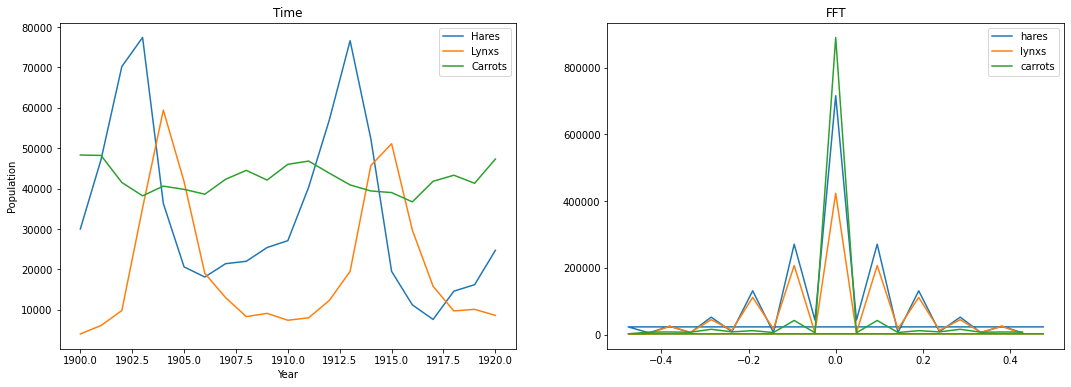

In [5]:
from scipy import fftpack

years, hares, lynxs, carrots = np.loadtxt('populations.txt').T

fig, axes = plt.subplots(1, 2, figsize = (18, 6))
axes[0].plot(years, hares , label = 'Hares') 
axes[0].plot(years, lynxs , label = 'Lynxs') 
axes[0].plot(years, carrots , label = 'Carrots') 
axes[0].legend()
axes[0].set_ylabel('Population')
axes[0].set_xlabel('Year')
axes[0].set_title('Time')

H_hares = fftpack.fft(hares)
H_lynxs = fftpack.fft(lynxs)
H_carrots = fftpack.fft(carrots)

dt = 1 
f_hares = fftpack.fftfreq(hares.size, d = dt)
f_lynxs = fftpack.fftfreq(lynxs.size, d = dt)
f_carrots = fftpack.fftfreq(carrots.size, d = dt)

# sort the freqs
i_hares = np.argsort(np.unravel_index(np.argsort(f_hares, axis=None), f_hares.shape))
i_lynxs = np.argsort(np.unravel_index(np.argsort(f_lynxs, axis=None), f_lynxs.shape))
i_carrots = np.argsort(np.unravel_index(np.argsort(f_carrots, axis=None), f_carrots.shape))
f_hares = f_hares[i_hares].reshape(f_hares.shape)
f_lynxs = f_lynxs[i_lynxs].reshape(f_lynxs.shape)
f_carrots = f_carrots[i_carrots].reshape(f_carrots.shape)

# sort the spectrum wrt the freqs
H_hares = H_hares[i_hares].reshape(f_hares.shape)
H_lynxs = H_lynxs[i_lynxs].reshape(f_lynxs.shape)
H_carrots = H_carrots[i_carrots].reshape(f_carrots.shape)

# plot the fft
axes[1].plot(f_hares, abs(H_hares), label='hares')
axes[1].plot(f_lynxs, abs(H_lynxs), label='lynxs')
axes[1].plot(f_carrots, abs(H_carrots), label='carrots')
axes[1].legend()
axes[1].set_title('FFT')

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

Q. Do you have any trouble visualising the spectrum? If so, why?
A. To visualize correctly the spectrum we must use a logaritmic scale because there are some high frequency peaks


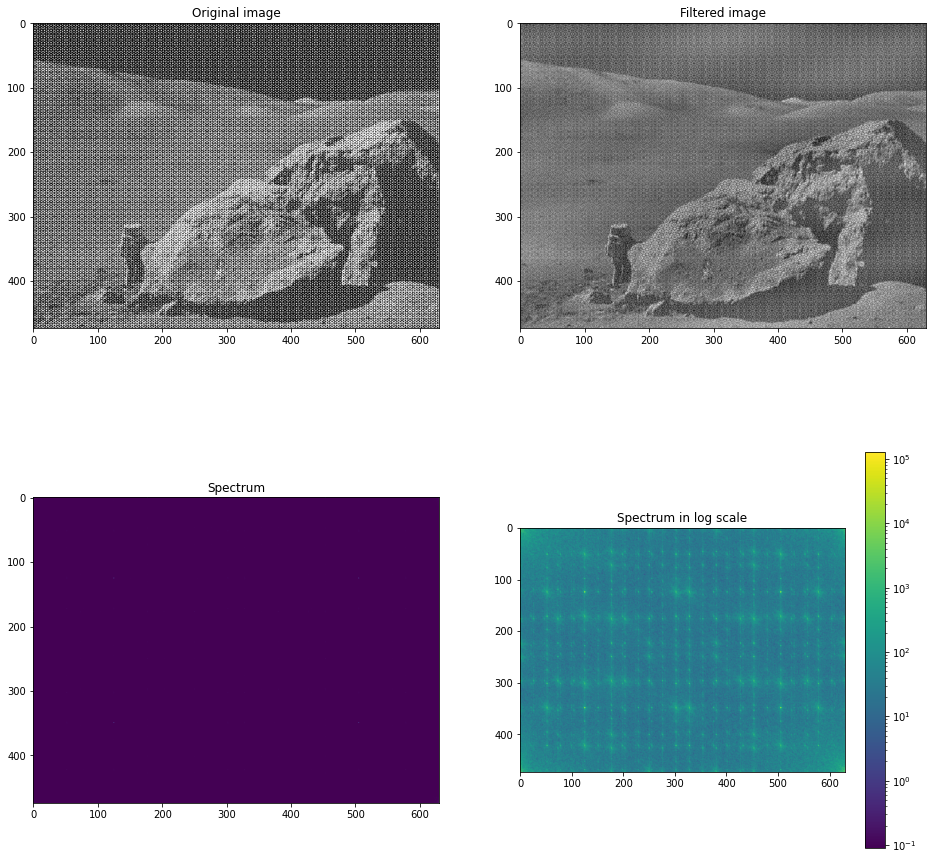

In [6]:
import pylab
from matplotlib.colors import LogNorm

# examine and load image contaminated with periodic noise
image = pylab.imread('moonlanding.png')
fig, axes = plt.subplots(2, 2 , figsize=(16, 16))
axes[0,0].imshow(image,  cmap='gray')
axes[0,0].set_title('Original image')

# 2D FFT of the image
S_image = fftpack.fft2(image) 

# display the absolute value of the spectrum
axes[1,0].imshow(np.abs(S_image))
axes[1,0].set_title('Spectrum')

# display the absolute value of the specture in log scale
c = axes[1,1].imshow(np.abs(S_image),  norm=LogNorm(vmin=np.min(np.abs(S_image)), vmax=np.max(np.abs(S_image))))
axes[1,1].set_title('Spectrum in log scale')
fig.colorbar(c, ax=axes[1,1])

# remove high frequency noise (set them to 0)
S_image[np.abs(S_image) > 2500] = 0

# apply inverse Fourier transform and display the results
filtered_image = fftpack.ifft2(S_image).real
axes[0,1].imshow(filtered_image, cmap='gray')
axes[0,1].set_title('Filtered image')

print("Q. Do you have any trouble visualising the spectrum? If so, why?")
print("A. To visualize correctly the spectrum we must use a logaritmic scale because there are some high frequency peaks")